In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from sklearn.metrics import mean_squared_error
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ticker_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in ticker_list:
    globals()[stock] = yf.download(stock, start, end)

# company_list: Contains the DataFrames of stock data for each company.
# company_name: Contains the corresponding names of the companies.
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]


#This loop iterates over pairs of DataFrames (company_list) and company names
#For each pair, it adds a new column named "company_name" to the DataFrame with the respective company's name.
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

#Finally, pd.concat() is used to concatenate all DataFrames in company_list
#Creating a single DataFrame named df that contains the combined stock data of all companies.
df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2014-05-08,21.008928,21.228930,20.942858,20.999643,18.600121,230297200,APPLE
2014-05-09,20.876429,20.937500,20.726070,20.912144,18.522612,291597600,APPLE
2014-05-12,20.981787,21.202143,20.978571,21.172501,18.753223,213208800,APPLE
2014-05-13,21.142857,21.233570,21.096430,21.205713,18.782640,159737200,APPLE
2014-05-14,21.158215,21.335714,21.133572,21.209642,18.786121,166404000,APPLE


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-01,181.639999,185.149994,176.559998,179.000000,179.000000,94645100,AMAZON
2024-05-02,180.850006,185.100006,179.910004,184.720001,184.720001,54303500,AMAZON
2024-05-03,186.990005,187.869995,185.419998,186.210007,186.210007,39172000,AMAZON
2024-05-06,186.279999,188.750000,184.800003,188.699997,188.699997,34725300,AMAZON
2024-05-07,188.919998,189.940002,187.309998,188.759995,188.759995,34020600,AMAZON


# **Moving Average**


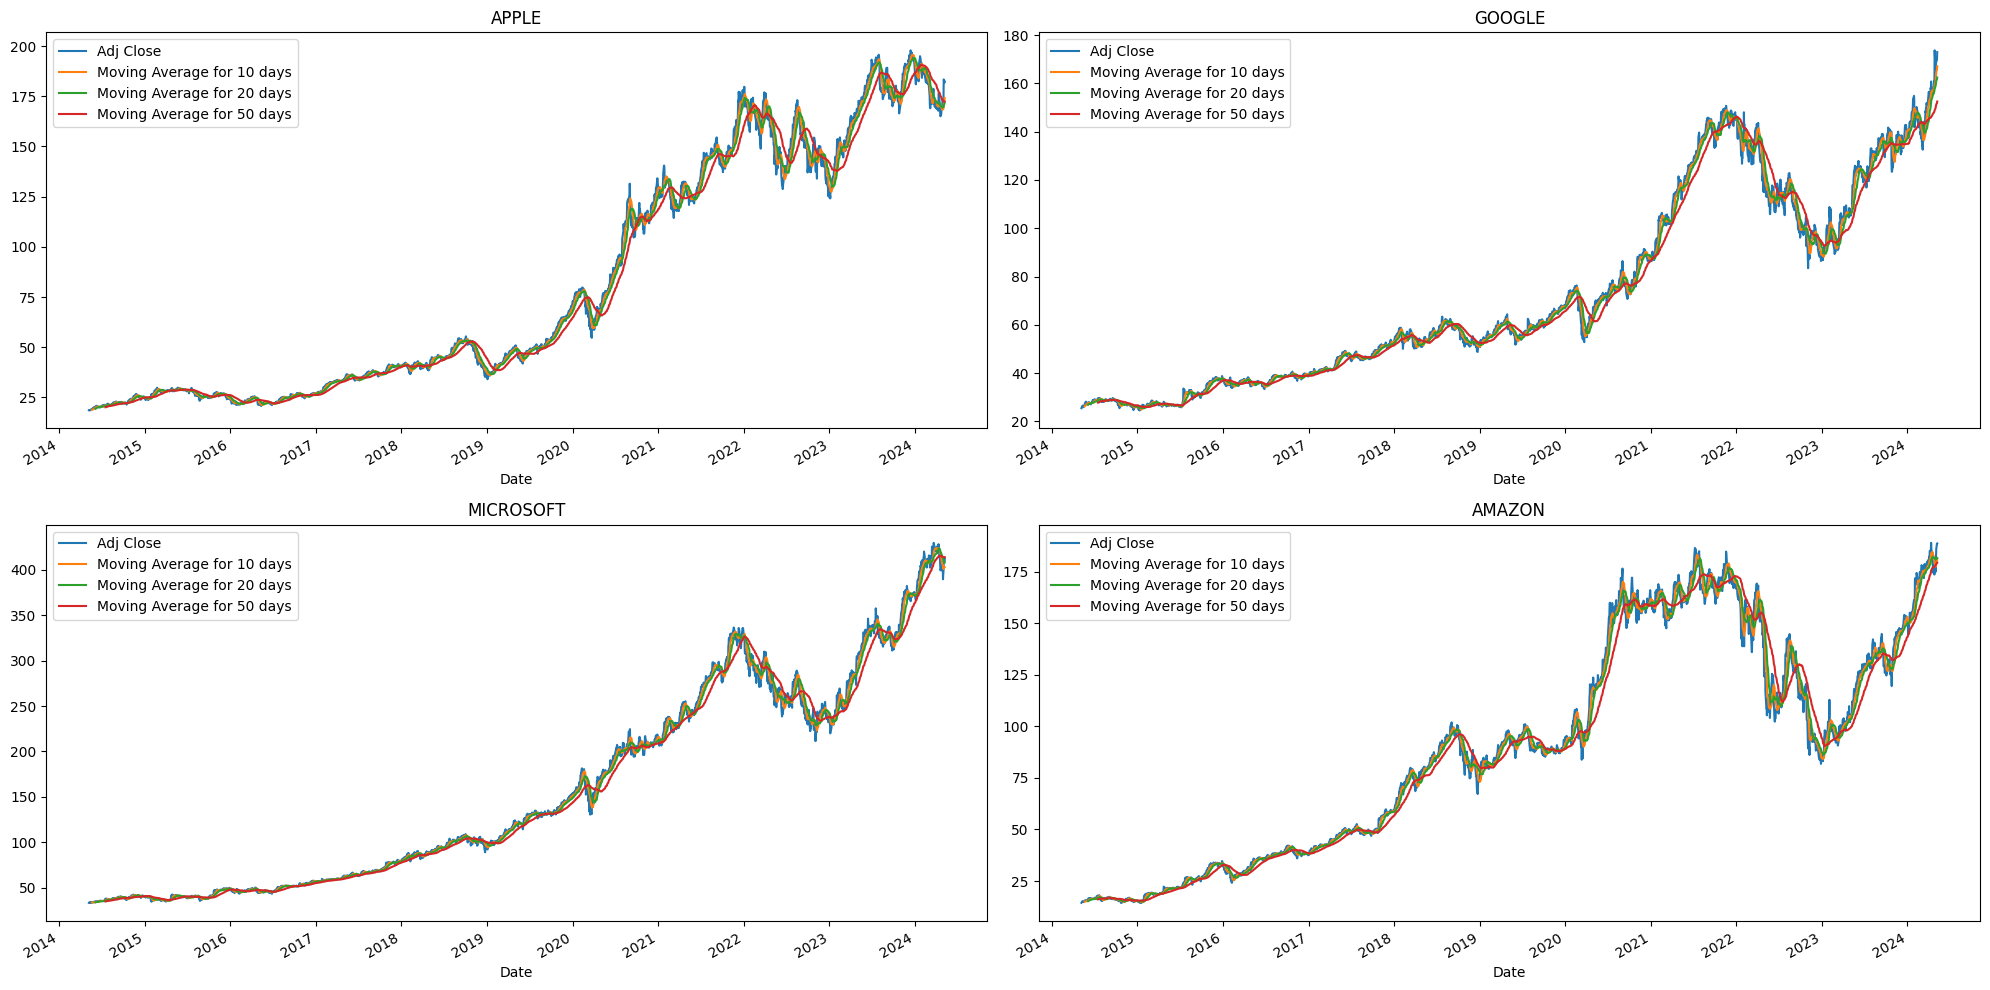

In [ ]:
# List of moving average days to calculate
ma_day = [10, 20, 50]

# Calculating moving averages for each company for specified number of days
for ma in ma_day:
    for company in company_list:
        # Defining a column for each moving average
        col_name = f"Moving Average for {ma} days"
        # Calculating moving average and assigning it to the new column we have created
        company[col_name] = company['Adj Close'].rolling(ma).mean()

# Creating subplots for each company's stock data and its moving averages
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)

# Plotting stock data and moving averages for APPLE
AAPL[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

# Plotting stock data and moving averages for GOOGLE
GOOG[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

# Plotting stock data and moving averages for MICROSOFT
MSFT[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

# Plotting stock data and moving averages for AMAZON
AMZN[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


In [ ]:
apple = AAPL
apple = apple.filter(['Close'], axis =1)

google = GOOG
google = google.filter(['Close'], axis =1)

microsoft = MSFT
microsoft = microsoft.filter(['Close'], axis =1)

amazon = AMZN
amazon = amazon.filter(['Close'], axis =1)

# **Data** **Normalization**
* Data Normalization helps in improving the convergence of optimization algorithms, such as those used in neural networks like LSTM. Min-Max scaling is one of the common methods used for normalization, where the minimum value of the feature is transformed to 0, and the maximum value is transformed to 1, with other values scaled accordingly.
* MinMaxScaler is useful when you want to ensure that all features have a similar scale and are constrained within a specific range, which can improve the performance of algorithms that are sensitive to the scale of input features, such as gradient-based optimization algorithms.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()
scaler4 = MinMaxScaler()
apple['Close'] = scaler1.fit_transform(apple[['Close']])
google['Close'] = scaler2.fit_transform(google[['Close']])
microsoft['Close'] = scaler3.fit_transform(microsoft[['Close']])
amazon['Close'] = scaler4.fit_transform(amazon[['Close']])

# **Converting the time series data into sequences suitable for LSTM training**

In [ ]:
seq_len=50
def create_sequences(data):
    X, y = [], []
    length = data.shape[0] - seq_len
    for i in range(length):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

In [ ]:
# Creating sequences
x_apple, y_apple= create_sequences(apple['Close'])
x_google, y_google= create_sequences(google['Close'])
x_microsoft, y_microsoft= create_sequences(microsoft['Close'])
x_amazon, y_amazon= create_sequences(amazon['Close'])

## **Train-Test Split**

In [ ]:
# Splitting into train and test sets
split_ratio = 0.8
split_index = int(split_ratio * len(x_apple))
x_train_apple, x_test_apple = x_apple[:split_index], x_apple[split_index:]
y_train_apple, y_test_apple = y_apple[:split_index], y_apple[split_index:]

split_index = int(split_ratio * len(x_google))
x_train_google, x_test_google = x_google[:split_index], x_google[split_index:]
y_train_google, y_test_google = y_google[:split_index], y_google[split_index:]

split_index = int(split_ratio * len(x_microsoft))
x_train_microsoft, x_test_microsoft = x_microsoft[:split_index], x_microsoft[split_index:]
y_train_microsoft, y_test_microsoft = y_microsoft[:split_index], y_microsoft[split_index:]

split_index = int(split_ratio * len(x_amazon))
x_train_amazon, x_test_amazon = x_amazon[:split_index], x_amazon[split_index:]
y_train_amazon, y_test_amazon = y_amazon[:split_index], y_amazon[split_index:]

# **Model Creation**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
def create_lstm_model(seq_len):
    model = Sequential([
        # LSTM layer with 50 units, relu activation function, and returning sequences
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_len, 1)),
        # Dropout layer to prevent overfitting
        Dropout(0.2),
        # LSTM layer with 50 units and relu activation function
        LSTM(50, activation='relu'),
        # Dropout layer to prevent overfitting
        Dropout(0.2),
        # Dense layer with 30 units
        Dense(30),
        # Output layer with 1 unit (for regression)
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
model1 = create_lstm_model(50)

# Reshaping data for LSTM input (samples, time steps, features)
x_train_apple = x_train_apple.reshape((x_train_apple.shape[0], x_train_apple.shape[1], 1))
x_test_apple = x_test_apple.reshape((x_test_apple.shape[0], x_test_apple.shape[1], 1))

# Model Training
model1.fit(x_train_apple, y_train_apple, epochs=50, batch_size=32, verbose=2)

# Predicting on the test set
y_pred_apple = model1.predict(x_test_apple)

# Evaluating the model
mse = mean_squared_error(y_test_apple, y_pred_apple)
print('Mean Squared Error:', mse)

rmse = np.sqrt(np.mean(((y_pred_apple - y_test_apple) ** 2)))
print('Root Mean Squared Error:', rmse)

Epoch 1/50
62/62 - 16s - loss: 0.0176 - 16s/epoch - 257ms/step
Epoch 2/50
62/62 - 6s - loss: 0.0025 - 6s/epoch - 96ms/step
Epoch 3/50
62/62 - 7s - loss: 0.0022 - 7s/epoch - 109ms/step
Epoch 4/50
62/62 - 4s - loss: 0.0017 - 4s/epoch - 58ms/step
Epoch 5/50
62/62 - 3s - loss: 0.0017 - 3s/epoch - 43ms/step
Epoch 6/50
62/62 - 3s - loss: 0.0015 - 3s/epoch - 44ms/step
Epoch 7/50
62/62 - 3s - loss: 0.0017 - 3s/epoch - 46ms/step
Epoch 8/50
62/62 - 4s - loss: 0.0014 - 4s/epoch - 69ms/step
Epoch 9/50
62/62 - 3s - loss: 0.0014 - 3s/epoch - 44ms/step
Epoch 10/50
62/62 - 3s - loss: 0.0015 - 3s/epoch - 44ms/step
Epoch 11/50
62/62 - 4s - loss: 0.0014 - 4s/epoch - 65ms/step
Epoch 12/50
62/62 - 5s - loss: 0.0014 - 5s/epoch - 77ms/step
Epoch 13/50
62/62 - 3s - loss: 0.0015 - 3s/epoch - 44ms/step
Epoch 14/50
62/62 - 3s - loss: 0.0013 - 3s/epoch - 43ms/step
Epoch 15/50
62/62 - 3s - loss: 0.0014 - 3s/epoch - 43ms/step
Epoch 16/50
62/62 - 3s - loss: 0.0013 - 3s/epoch - 53ms/step
Epoch 17/50
62/62 - 4s - loss

<ipython-input-13-31c612b8ca1c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_apple['Predictions'] = y_pred_apple


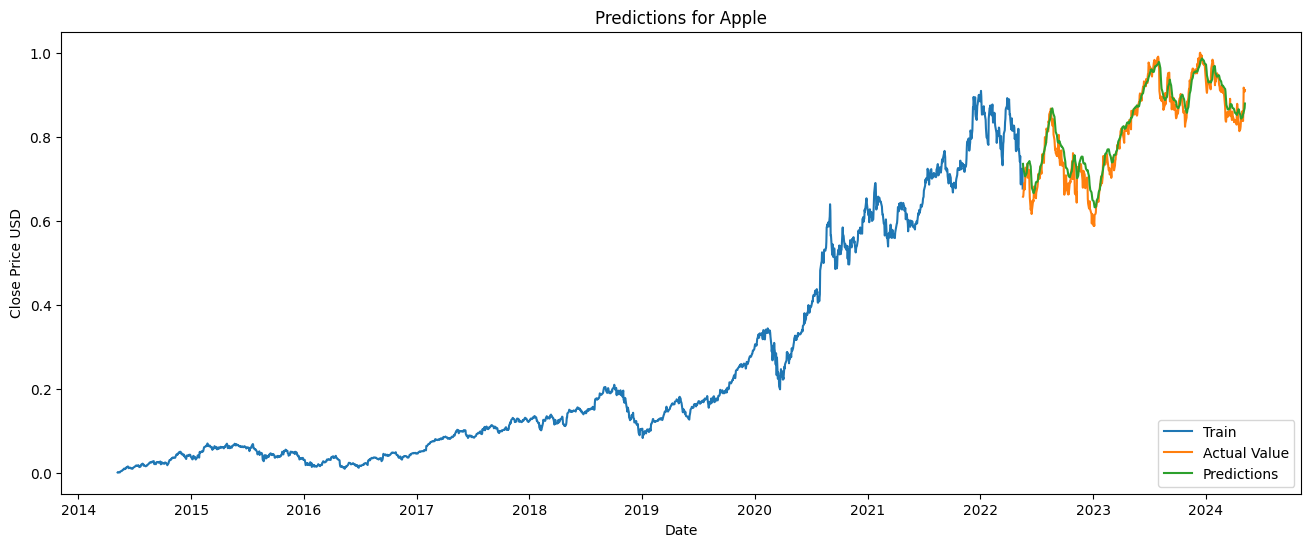

In [ ]:
# Determine the length for the train set
length = x_train_apple.shape[0] + 50

# Splitting the data into train and validation sets based on the determined length
train_apple = apple[:length]  # Data for training
valid_apple = apple[length:]  # Data for validation

# Adding the predictions to the validation set
valid_apple['Predictions'] = y_pred_apple

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Predictions for Apple')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Close Price USD')  # Y-axis label
plt.plot(train_apple['Close'])  # Plotting the training data
plt.plot(valid_apple[['Close', 'Predictions']])  # Plotting the validation data along with predictions
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
model2 = create_lstm_model(50)

# Reshaping data for LSTM input (samples, time steps, features)
x_train_google = x_train_google.reshape((x_train_google.shape[0], x_train_google.shape[1], 1))
x_test_google = x_test_google.reshape((x_test_google.shape[0], x_test_google.shape[1], 1))

# Model Training
model2.fit(x_train_google, y_train_google, epochs=50, batch_size=32, verbose=2)

# Predicting on the test set
y_pred_google = model2.predict(x_test_google)

# Evaluating the model
mse = mean_squared_error(y_test_google, y_pred_google)
print('Mean Squared Error:', mse)

rmse = np.sqrt(np.mean(((y_pred_google - y_test_google) ** 2)))
print('Root Mean Squared Error:', rmse)

Epoch 1/50
62/62 - 7s - loss: 0.0095 - 7s/epoch - 106ms/step
Epoch 2/50
62/62 - 6s - loss: 0.0020 - 6s/epoch - 89ms/step
Epoch 3/50
62/62 - 3s - loss: 0.0018 - 3s/epoch - 45ms/step
Epoch 4/50
62/62 - 3s - loss: 0.0016 - 3s/epoch - 44ms/step
Epoch 5/50
62/62 - 3s - loss: 0.0015 - 3s/epoch - 43ms/step
Epoch 6/50
62/62 - 4s - loss: 0.0015 - 4s/epoch - 69ms/step
Epoch 7/50
62/62 - 3s - loss: 0.0016 - 3s/epoch - 43ms/step
Epoch 8/50
62/62 - 3s - loss: 0.0012 - 3s/epoch - 44ms/step
Epoch 9/50
62/62 - 3s - loss: 0.0019 - 3s/epoch - 44ms/step
Epoch 10/50
62/62 - 4s - loss: 0.0012 - 4s/epoch - 59ms/step
Epoch 11/50
62/62 - 3s - loss: 0.0013 - 3s/epoch - 55ms/step
Epoch 12/50
62/62 - 3s - loss: 0.0014 - 3s/epoch - 43ms/step
Epoch 13/50
62/62 - 3s - loss: 0.0013 - 3s/epoch - 44ms/step
Epoch 14/50
62/62 - 3s - loss: 0.0013 - 3s/epoch - 44ms/step
Epoch 15/50
62/62 - 5s - loss: 0.0010 - 5s/epoch - 73ms/step
Epoch 16/50
62/62 - 3s - loss: 0.0011 - 3s/epoch - 44ms/step
Epoch 17/50
62/62 - 3s - loss: 0

<ipython-input-15-6be1cab507b4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_google['Predictions'] = y_pred_google


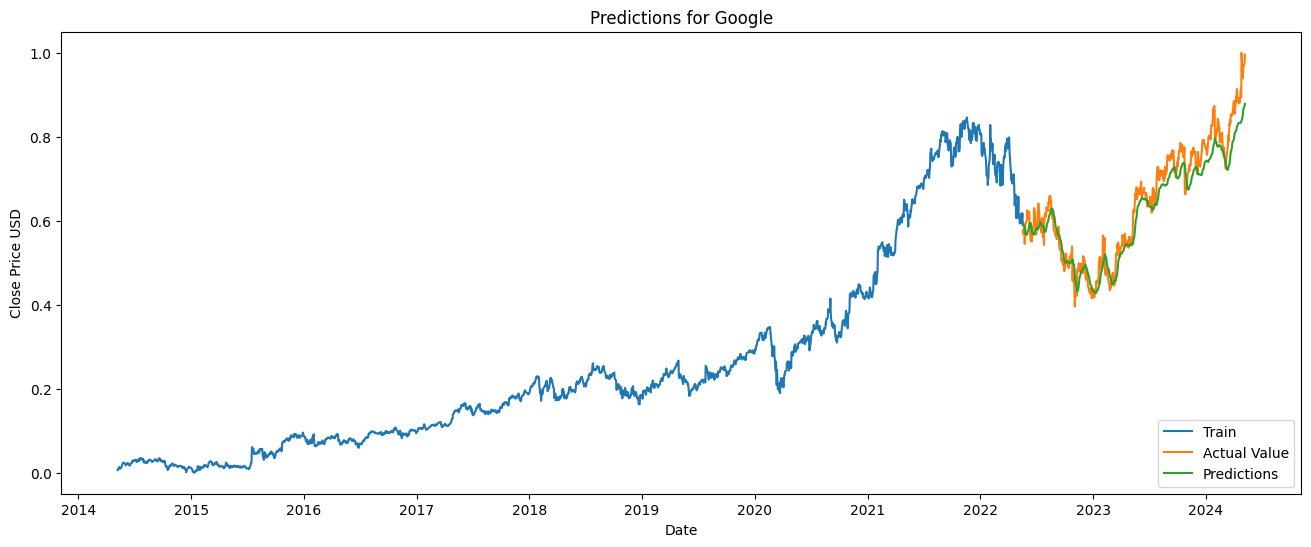

In [ ]:
# Determine the length for the train set
length = x_train_google.shape[0] + 50

# Splitting the data into train and validation sets based on the determined length
train_google = google[:length]  # Data for training
valid_google = google[length:]  # Data for validation

# Adding the predictions to the validation set
valid_google['Predictions'] = y_pred_google

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Predictions for Google')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Close Price USD')  # Y-axis label
plt.plot(train_google['Close'])  # Plotting the training data
plt.plot(valid_google[['Close', 'Predictions']])  # Plotting the validation data along with predictions
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
model3 = create_lstm_model(50)

# Reshaping data for LSTM input (samples, time steps, features)
x_train_microsoft = x_train_microsoft.reshape((x_train_microsoft.shape[0], x_train_microsoft.shape[1], 1))
x_test_microsoft = x_test_microsoft.reshape((x_test_microsoft.shape[0], x_test_microsoft.shape[1], 1))

# Model Training
model3.fit(x_train_microsoft, y_train_microsoft, epochs=50, batch_size=32, verbose=2)

# Predicting on the test set
y_pred_microsoft = model3.predict(x_test_microsoft)

# Evaluating the model
mse = mean_squared_error(y_test_microsoft, y_pred_microsoft)
print('Mean Squared Error:', mse)

rmse = np.sqrt(np.mean(((y_pred_microsoft - y_test_microsoft) ** 2)))
print('Root Mean Squared Error:', rmse)

Epoch 1/50
62/62 - 7s - loss: 0.0130 - 7s/epoch - 117ms/step
Epoch 2/50
62/62 - 3s - loss: 0.0022 - 3s/epoch - 45ms/step
Epoch 3/50
62/62 - 3s - loss: 0.0016 - 3s/epoch - 43ms/step
Epoch 4/50
62/62 - 4s - loss: 0.0012 - 4s/epoch - 57ms/step
Epoch 5/50
62/62 - 4s - loss: 0.0012 - 4s/epoch - 59ms/step
Epoch 6/50
62/62 - 3s - loss: 0.0010 - 3s/epoch - 45ms/step
Epoch 7/50
62/62 - 3s - loss: 0.0011 - 3s/epoch - 44ms/step
Epoch 8/50
62/62 - 3s - loss: 0.0011 - 3s/epoch - 45ms/step
Epoch 9/50
62/62 - 5s - loss: 0.0010 - 5s/epoch - 73ms/step
Epoch 10/50
62/62 - 3s - loss: 9.4682e-04 - 3s/epoch - 44ms/step
Epoch 11/50
62/62 - 3s - loss: 0.0011 - 3s/epoch - 44ms/step
Epoch 12/50
62/62 - 3s - loss: 0.0011 - 3s/epoch - 44ms/step
Epoch 13/50
62/62 - 3s - loss: 9.8920e-04 - 3s/epoch - 56ms/step
Epoch 14/50
62/62 - 4s - loss: 8.9949e-04 - 4s/epoch - 61ms/step
Epoch 15/50
62/62 - 3s - loss: 8.5320e-04 - 3s/epoch - 44ms/step
Epoch 16/50
62/62 - 3s - loss: 9.1988e-04 - 3s/epoch - 43ms/step
Epoch 17/50


<ipython-input-17-cfe7345002a6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_microsoft['Predictions'] = y_pred_microsoft


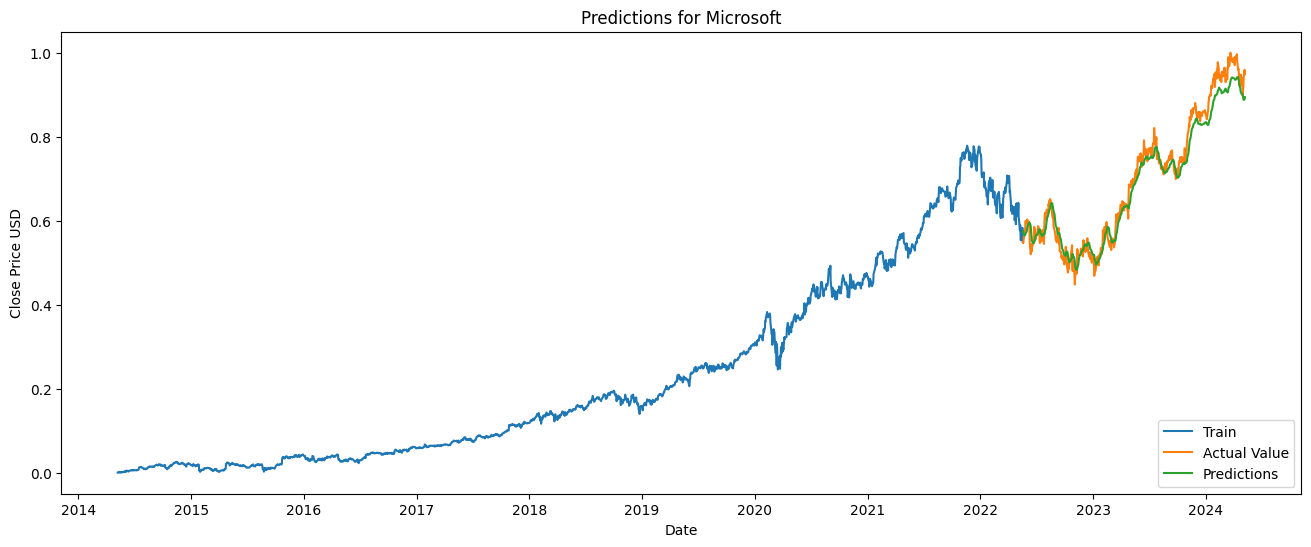

In [ ]:
# Determine the length for the train set
length = x_train_microsoft.shape[0] + 50

# Splitting the data into train and validation sets based on the determined length
train_microsoft = microsoft[:length]  # Data for training
valid_microsoft = microsoft[length:]  # Data for validation

# Adding the predictions to the validation set
valid_microsoft['Predictions'] = y_pred_microsoft

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Predictions for Microsoft')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Close Price USD')  # Y-axis label
plt.plot(train_microsoft['Close'])  # Plotting the training data
plt.plot(valid_microsoft[['Close', 'Predictions']])  # Plotting the validation data along with predictions
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
model4 = create_lstm_model(50)
# Reshaping data for LSTM input (samples, time steps, features)
x_train_amazon = x_train_amazon.reshape((x_train_amazon.shape[0], x_train_amazon.shape[1], 1))
x_test_amazon = x_test_amazon.reshape((x_test_amazon.shape[0], x_test_amazon.shape[1], 1))

# Model Training
model4.fit(x_train_amazon, y_train_amazon, epochs=50, batch_size=32, verbose=2)

# Predicting on the test set
y_pred_amazon = model4.predict(x_test_amazon)

# Evaluating the model
mse = mean_squared_error(y_test_amazon, y_pred_amazon)
print('Mean Squared Error:', mse)

rmse = np.sqrt(np.mean(((y_pred_amazon - y_test_amazon) ** 2)))
print('Root Mean Squared Error:', rmse)

Epoch 1/50
62/62 - 8s - loss: 0.0345 - 8s/epoch - 124ms/step
Epoch 2/50
62/62 - 4s - loss: 0.0039 - 4s/epoch - 56ms/step
Epoch 3/50
62/62 - 4s - loss: 0.0032 - 4s/epoch - 60ms/step
Epoch 4/50
62/62 - 3s - loss: 0.0030 - 3s/epoch - 44ms/step
Epoch 5/50
62/62 - 3s - loss: 0.0026 - 3s/epoch - 44ms/step
Epoch 6/50
62/62 - 3s - loss: 0.0028 - 3s/epoch - 43ms/step
Epoch 7/50
62/62 - 4s - loss: 0.0022 - 4s/epoch - 68ms/step
Epoch 8/50
62/62 - 3s - loss: 0.0021 - 3s/epoch - 46ms/step
Epoch 9/50
62/62 - 3s - loss: 0.0020 - 3s/epoch - 43ms/step
Epoch 10/50
62/62 - 3s - loss: 0.0021 - 3s/epoch - 44ms/step
Epoch 11/50
62/62 - 3s - loss: 0.0020 - 3s/epoch - 48ms/step
Epoch 12/50
62/62 - 4s - loss: 0.0019 - 4s/epoch - 67ms/step
Epoch 13/50
62/62 - 3s - loss: 0.0019 - 3s/epoch - 44ms/step
Epoch 14/50
62/62 - 3s - loss: 0.0019 - 3s/epoch - 44ms/step
Epoch 15/50
62/62 - 3s - loss: 0.0021 - 3s/epoch - 43ms/step
Epoch 16/50
62/62 - 4s - loss: 0.0017 - 4s/epoch - 60ms/step
Epoch 17/50
62/62 - 3s - loss: 0

<ipython-input-19-886fb1822f70>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_amazon['Predictions'] = y_pred_amazon


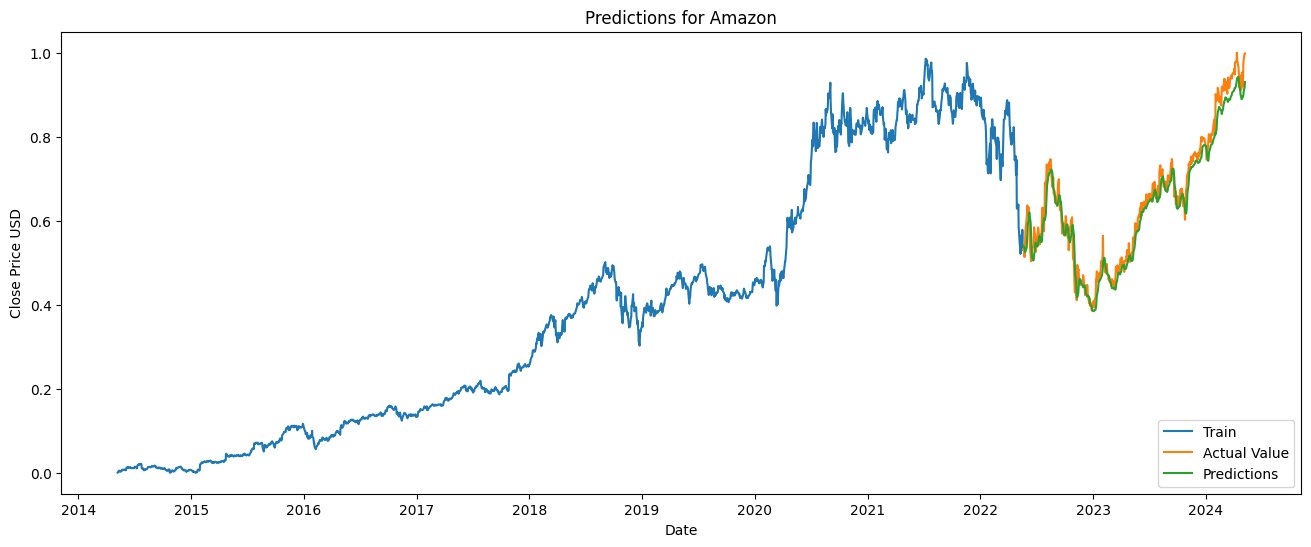

In [ ]:
# Determine the length for the train set
length = x_train_amazon.shape[0] + 50

# Splitting the data into train and validation sets based on the determined length
train_amazon = amazon[:length]  # Data for training
valid_amazon = amazon[length:]  # Data for validation

# Adding the predictions to the validation set
valid_amazon['Predictions'] = y_pred_amazon

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Predictions for Amazon')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Close Price USD')  # Y-axis label
plt.plot(train_amazon['Close'])  # Plotting the training data
plt.plot(valid_amazon[['Close', 'Predictions']])  # Plotting the validation data along with predictions
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Inverse transform the predicted values to the original scale
y_pred_apple = scaler1.inverse_transform(y_pred_apple)

In [ ]:
# Making a copy of the AAPL DataFrame
apple_pred = AAPL.copy()

# Dropping unnecessary columns from the copied DataFrame
apple_pred.drop(columns=['Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days'], inplace=True)

# Calculate the starting index for updating the 'Close' values
ptr = 50 + x_train_apple.shape[0]
start_index = ptr

# Iterating over the predicted values to update the 'Close' column in the copied DataFrame
for i in range(y_pred_apple.shape[0]):
    apple_pred.iloc[ptr, apple_pred.columns.get_loc('Close')] = y_pred_apple[i]
    ptr += 1

# Selecting the portion of the DataFrame after the start index to remove unchanged initial points
apple_pred = apple_pred.iloc[start_index:]

In [ ]:
apple_pred.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-01,169.580002,172.710007,169.110001,172.255112,169.300003,50383100,APPLE
2024-05-02,172.509995,173.419998,170.889999,172.489456,173.029999,94214900,APPLE
2024-05-03,186.649994,187.000000,182.660004,173.018066,183.380005,163224100,APPLE
2024-05-06,182.350006,184.199997,180.419998,174.792130,181.710007,78569700,APPLE
2024-05-07,183.449997,184.899994,181.320007,176.674301,182.399994,77237500,APPLE


In [ ]:
# Inverse transform the predicted values to the original scale
y_pred_google = scaler2.inverse_transform(y_pred_google)

In [ ]:
# Making a copy of the GOOG DataFrame
google_pred = GOOG.copy()

# Dropping unnecessary columns from the copied DataFrame
google_pred.drop(columns=['Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days'], inplace=True)

# Calculate the starting index for updating the 'Close' values
ptr = 50 + x_train_google.shape[0]
start_index = ptr

# Iterating over the predicted values to update the 'Close' column in the copied DataFrame
for i in range(y_pred_google.shape[0]):
    google_pred.iloc[ptr, google_pred.columns.get_loc('Close')] = y_pred_google[i]
    ptr += 1

# Selecting the portion of the DataFrame after the start index to remove unchanged initial points
google_pred = google_pred.iloc[start_index:]

In [ ]:
google_pred.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-01,166.179993,168.809998,164.899994,152.689270,165.570007,25223200,GOOGLE
2024-05-02,166.669998,168.529999,165.690002,153.384720,168.460007,17041100,GOOGLE
2024-05-03,169.539993,169.850006,164.979996,154.121918,168.990005,22767100,GOOGLE
2024-05-06,169.220001,169.899994,167.889999,154.846863,169.830002,15147900,GOOGLE
2024-05-07,170.119995,173.470001,170.000000,155.557770,172.979996,21086800,GOOGLE


In [ ]:
# Inverse transform the predicted values to the original scale
y_pred_microsoft = scaler3.inverse_transform(y_pred_microsoft)

In [ ]:
# Making a copy of the MSFT DataFrame
microsoft_pred = MSFT.copy()

# Dropping unnecessary columns from the copied DataFrame
microsoft_pred.drop(columns=['Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days'], inplace=True)

# Calculate the starting index for updating the 'Close' values
ptr = 50 + x_train_microsoft.shape[0]
start_index = ptr

# Iterating over the predicted values to update the 'Close' column in the copied DataFrame
for i in range(y_pred_microsoft.shape[0]):
    microsoft_pred.iloc[ptr, microsoft_pred.columns.get_loc('Close')] = y_pred_microsoft[i]
    ptr += 1

# Selecting the portion of the DataFrame after the start index to remove unchanged initial points
microsoft_pred = microsoft_pred.iloc[start_index:]

In [ ]:
microsoft_pred.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-01,392.609985,401.720001,390.309998,388.227905,394.940002,23562500,MICROSOFT
2024-05-02,397.660004,399.929993,394.649994,386.568604,397.839996,17709400,MICROSOFT
2024-05-03,402.279999,407.149994,401.859985,385.633850,406.660004,17446700,MICROSOFT
2024-05-06,408.760010,413.929993,406.369995,386.224823,413.540009,16996600,MICROSOFT
2024-05-07,414.660004,414.670013,409.089996,388.133148,409.339996,20002700,MICROSOFT


In [ ]:
# Inverse transform the predicted values to the original scale
y_pred_amazon = scaler4.inverse_transform(y_pred_amazon)

In [ ]:
# Making a copy of the AMZN DataFrame
amazon_pred = AMZN.copy()

# Dropping unnecessary columns from the copied DataFrame
amazon_pred.drop(columns=['Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days'], inplace=True)

# Calculate the starting index for updating the 'Close' values
ptr = 50 + x_train_amazon.shape[0]
start_index = ptr

# Iterating over the predicted values to update the 'Close' column in the copied DataFrame
for i in range(y_pred_amazon.shape[0]):
    amazon_pred.iloc[ptr, amazon_pred.columns.get_loc('Close')] = y_pred_amazon[i]
    ptr += 1

# Selecting the portion of the DataFrame after the start index to remove unchanged initial points
amazon_pred = amazon_pred.iloc[start_index:]

In [ ]:
amazon_pred.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-01,181.639999,185.149994,176.559998,171.035873,179.000000,94645100,AMAZON
2024-05-02,180.850006,185.100006,179.910004,171.450546,184.720001,54303500,AMAZON
2024-05-03,186.990005,187.869995,185.419998,172.910034,186.210007,39172000,AMAZON
2024-05-06,186.279999,188.750000,184.800003,174.755646,188.699997,34725300,AMAZON
2024-05-07,188.919998,189.940002,187.309998,176.852951,188.759995,34020600,AMAZON


# **NOTE**

**The datasets apple_pred, google_pred, microsoft_pred, and amazon_pred contain historical stock data for Apple, Microsoft, and Amazon covering the past two years. These datasets include predicted closing values for each respective stock. Now, we'll use this data to create an optimized portfolio.**

In [ ]:
# Define ticker list and date range
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
datas = [apple_pred, google_pred,microsoft_pred,amazon_pred]

# Download stock data for each ticker
company_list = []
for stock in datas:
    data = stock
    company_list.append(data)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(company_list)

## **Montecarlo Simulation**

In [ ]:
# 252- number of trading days in a year.
# calculates the performance metrics of a portfolio based on the weights, mean returns, covariance matrix, and risk-free rate.
def calc_portfolio_perf(weights, mean_returns, cov, rf):

    #  Calculating the annualized portfolio return
    portfolio_return = np.sum(mean_returns * weights) * 252

    #  Calculates the annualized portfolio standard deviation
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)

    # Calculates the Sharpe ratio of the portfolio, which measures the excess return per unit od risk.
    sharpe_ratio = (portfolio_return - rf) / portfolio_std

    return portfolio_return, portfolio_std, sharpe_ratio

# monte carlo brute force
def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):

    results = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results[0,i] = portfolio_return
        results[1,i] = portfolio_std
        results[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results[j+3,i] = weights[j]

    results_df = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [ ]:
# Calculate mean returns and covariance
mean_returns = df.groupby('company_name').apply(lambda x: x['Adj Close'].pct_change().mean())
cov = df.pivot_table(index='Date', columns='company_name', values='Adj Close').pct_change().cov()


# Simulation and other calculations
num_portfolios = 100000
rf = 0.02
results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

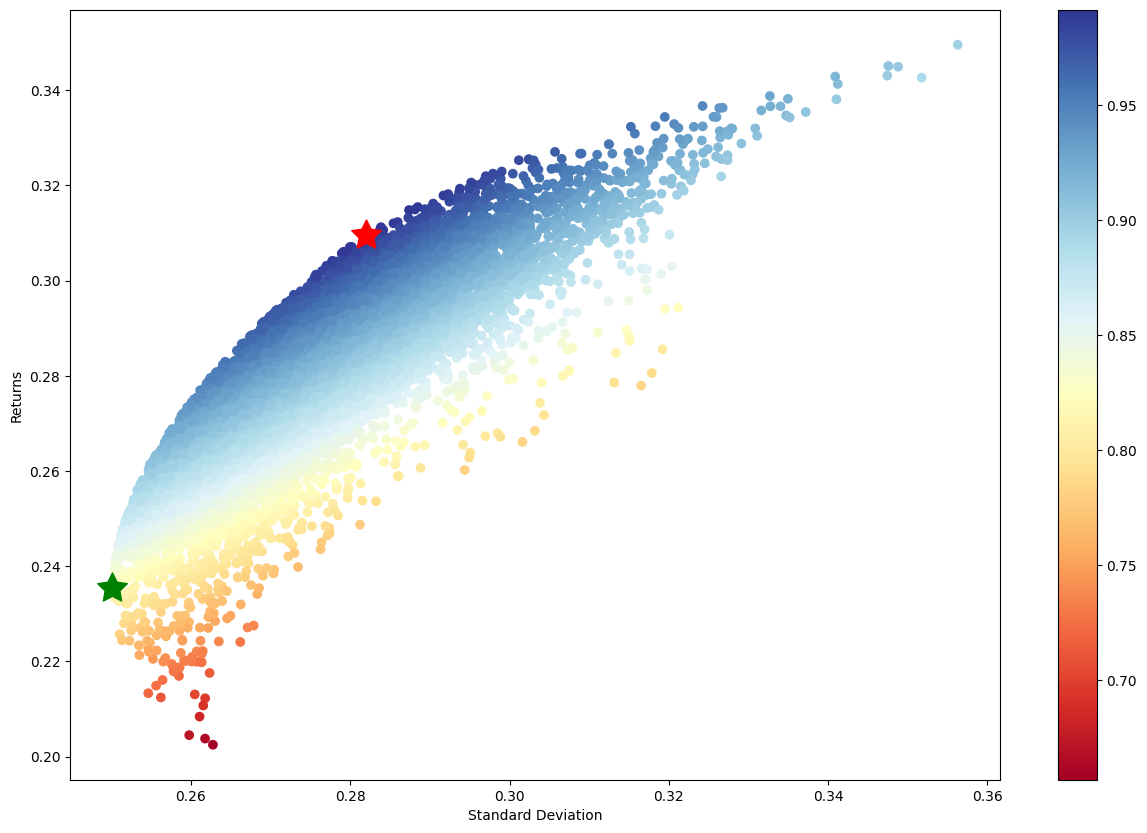

In [ ]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)

#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [ ]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,AAPL,GOOG,MSFT,AMZN
9224,0.309495,0.281937,0.99134,0.271741,0.005426,0.032598,0.690234


In [ ]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AAPL,GOOG,MSFT,AMZN
7200,0.235397,0.250128,0.821167,0.000163,0.532438,0.055437,0.411962


In [ ]:
def calc_portfolio_std(weights, mean_returns, cov):
  # calculating standard deviation
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    return portfolio_std
def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    # bounds - to make sure each wieght between 0 to 1
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    #scipy optimization to mini
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_variance = min_variance(mean_returns, cov)

In [ ]:
pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=tickers).T

,AAPL,GOOG,MSFT,AMZN
0,0.0,0.55,0.04,0.42


In [ ]:
optimal_weights = min_port_variance['x']

# Calculate portfolio return, standard deviation, and Sharpe ratio using optimal weights
portfolio_return = np.sum(mean_returns * optimal_weights) * 252
portfolio_std = np.sqrt(np.dot(optimal_weights.T, np.dot(cov, optimal_weights))) * np.sqrt(252)
sharpe_ratio = (portfolio_return - rf) / portfolio_std

# Print the results
print("Portfolio Return:", round(portfolio_return, 4))
print("Portfolio Standard Deviation:", round(portfolio_std, 4))
print("Portfolio Sharpe Ratio:", round(sharpe_ratio, 4))

Portfolio Return: 0.234
Portfolio Standard Deviation: 0.2501
Portfolio Sharpe Ratio: 0.8159


In [ ]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
# Calculate portfolio return, standard deviation, and Sharpe ratio using optimal weights

    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return 1/(1+sharpe_ratio)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

In [ ]:
pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=tickers).T


,AAPL,GOOG,MSFT,AMZN
0,0.32,0.0,0.04,0.64


In [ ]:
optimal_weights = optimal_port_sharpe['x']

# Calculate portfolio return, standard deviation, and Sharpe ratio using optimal weights
portfolio_return = np.sum(mean_returns * optimal_weights) * 252
portfolio_std = np.sqrt(np.dot(optimal_weights.T, np.dot(cov, optimal_weights))) * n p.sqrt(252)
sharpe_ratio = (portfolio_return - rf) / portfolio_std

# Print the results
print("Portfolio Return:", round(portfolio_return, 4))
print("Portfolio Standard Deviation:", round(portfolio_std, 4))
print("Portfolio Sharpe Ratio:", round(sharpe_ratio, 4))

Portfolio Return: 0.3135
Portfolio Standard Deviation: 0.2854
Portfolio Sharpe Ratio: 0.9931
